In [1]:
import seaborn as sns
import matplotlib as mpl
from pathlib import Path
import pandas as pd
import anndata as ad
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
sns.reset_defaults()
import matplotlib.patches as  mpatches
mpl.rcParams.update(mpl.rcParamsDefault)
sns.set_theme("notebook", rc={"lines.linewidth": 1.5}) # font_scale=1, 
sns.set_style("white", )
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(context='notebook', style='ticks', font_scale=1, font='sans-serif', rc={"lines.linewidth": 1.2})
sns.set_style("white")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [2]:
baseline_data_adni_ppmi = pd.read_csv("streamlit_app/adni_ppmi_baseline_data.csv")
baseline_data_ukbb = pd.read_csv("streamlit_app/ukbb_baseline_data2.csv")

In [3]:
baseline_data_adni_ppmi

,un_AD_score,un_PD_score,AD_score,PD_score,csf_alpha,serum_nfl,csf_p_tau181,csf_total_tau,subtype_cognitive,subtype_motor,...,adas13,fdg,av45,subject_id,baseline_age,years_from_baseline,study_diagnosis,age,gender,subtype.1
0,0.196256,0.436962,-1.409860,-0.253500,NaN,NaN,NaN,NaN,NaN,NaN,...,9.00,1.271098,1.4881,ADNI-002_S_0295,89.868493,0.0,ADNI_Control,89.868493,M,None
1,0.045842,0.560750,-3.035636,0.244207,NaN,NaN,NaN,NaN,NaN,NaN,...,4.33,NaN,NaN,ADNI-002_S_0413,76.298630,0.0,ADNI_Control,76.298630,F,None
2,0.046465,0.456716,-3.021468,-0.173572,NaN,NaN,NaN,NaN,NaN,NaN,...,8.00,NaN,NaN,ADNI-002_S_0559,79.298630,0.0,ADNI_Control,79.298630,NaN,None
3,0.980387,0.606330,3.911741,0.431910,NaN,NaN,NaN,NaN,NaN,NaN,...,30.33,NaN,NaN,ADNI-002_S_0619,77.498630,0.0,ADNI_Dementia,77.498630,NaN,None
4,0.132780,0.629053,-1.876597,0.528156,NaN,NaN,NaN,NaN,NaN,NaN,...,8.00,NaN,NaN,ADNI-002_S_0685,94.561644,0.0,ADNI_Control,94.561644,F,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,0.329608,0.783181,-0.709958,1.284303,NaN,10.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,PPMI-85236,66.600000,0.0,PPMI_PRODROMA,66.600000,M,None
3317,0.220540,0.834030,-1.262520,1.614462,NaN,10.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,PPMI-85242,63.698630,0.0,PPMI_PRODROMA,63.698630,M,None
3318,0.686163,0.788541,0.782241,1.316155,1133.5,25.7,10.43,137.9,NaN,NaN,...,NaN,NaN,NaN,PPMI-90456,82.498630,0.0,PPMI_PRODROMA,82.498630,M,None
3319,0.520612,0.806928,0.082495,1.430169,1806.6,NaN,15.00,185.7,NaN,NaN,...,NaN,NaN,NaN,PPMI-91837,73.898630,0.0,PPMI_PRODROMA,73.898630,M,None


In [4]:
baseline_data = pd.concat([baseline_data_adni_ppmi, baseline_data_ukbb], axis=0).copy()

In [5]:
baseline_data

,un_AD_score,un_PD_score,AD_score,PD_score,csf_alpha,serum_nfl,csf_p_tau181,csf_total_tau,subtype_cognitive,subtype_motor,...,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pca_HT_ISS_PRS,pca1_prs,pca2_prs
0,0.196256,0.436962,-1.409860,-0.253500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.045842,0.560750,-3.035636,0.244207,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.046465,0.456716,-3.021468,-0.173572,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.980387,0.606330,3.911741,0.431910,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.132780,0.629053,-1.876597,0.528156,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42915,0.244310,0.656115,-1.629081,0.932026,NaN,NaN,NaN,NaN,NaN,NaN,...,2.499080,-0.675088,0.988682,-2.083130,-0.137675,0.164552,-3.30169,2.016459,1.969097,0.418253
42916,0.128260,0.681719,-2.764828,1.098879,NaN,NaN,NaN,NaN,NaN,NaN,...,-11.854700,-7.760460,3.643080,0.252772,6.410140,-0.398777,-2.49332,-0.178534,-0.263088,0.568501
42917,0.031554,0.766749,-4.939775,1.716873,NaN,NaN,NaN,NaN,NaN,NaN,...,-13.393700,-3.006850,1.897120,6.219980,5.089020,-0.260582,-6.54768,-2.245249,-2.242633,-0.293164
42918,0.138107,0.809186,-2.641722,2.084300,NaN,NaN,NaN,NaN,NaN,NaN,...,0.065554,1.007390,-0.691347,2.499890,-1.761870,0.396911,-1.83256,0.118110,-0.025934,1.044971


In [6]:
baseline_data = baseline_data[baseline_data['study_diagnosis'].isin(['ADNI_Control', 'ADNI_MCI', 'ADNI_Dementia', 'PPMI_PD', 'PPMI_Control', 'UKBB_HC'])]
baseline_data['study_diagnosis'] = baseline_data['study_diagnosis'].astype(str)# .value_counts()

/var/folders/y5/tr1yp82s2ns2_4g_6flxk45jrqb07t/T/ipykernel_86066/1730054149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_data['study_diagnosis'] = baseline_data['study_diagnosis'].astype(str)# .value_counts()


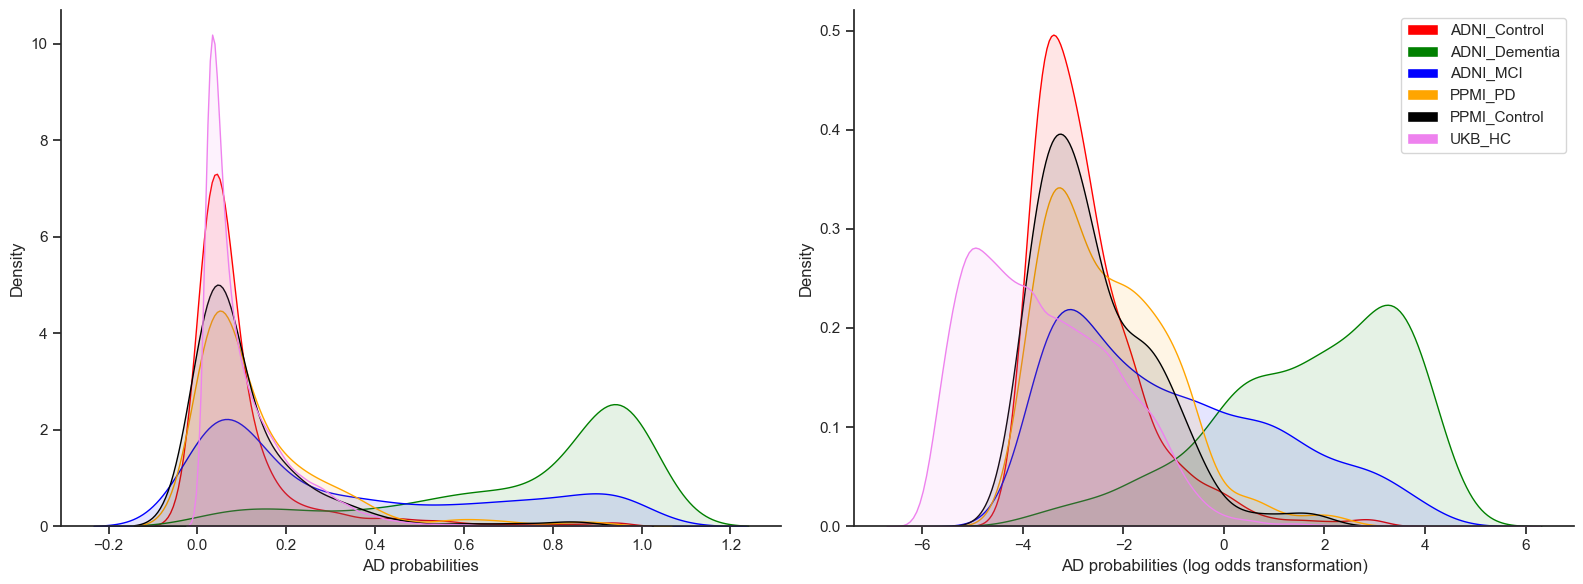

In [7]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(16,6))
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
colorlist = ['red', 'green', 'blue', 'orange', 'black', 'violet']
labels = []
for e, sd in enumerate(baseline_data['study_diagnosis'].unique()):
    sns.kdeplot(data=baseline_data[baseline_data['study_diagnosis']==sd], x='un_AD_score',color=colorlist[e], fill=colorlist[e], ax=ax, label=sd, alpha=0.1, linewidth=1,)
    labels.append(sd)

labels = []
for e, sd in enumerate(baseline_data['study_diagnosis'].unique()):
    sns.kdeplot(data=baseline_data[baseline_data['study_diagnosis']==sd], x='AD_score',color=colorlist[e], fill=colorlist[e], ax=ax2, label=sd, alpha=0.1, linewidth=1,)
    labels.append(sd)

handles = [mpatches.Patch(facecolor=colorlist[e], label=i.replace('UKBB_HC', 'UKB_HC')) for e, i in enumerate(labels)]
plt.legend(handles=handles, loc=0)
ax.set_xlabel('AD probabilities')
ax2.set_xlabel('AD probabilities (log odds transformation)')
plt.tight_layout()
plt.savefig("Step2_ml_model/AD_score_distribution_all_cohorts.png", dpi=200)
plt.savefig("Step2_ml_model/AD_score_distribution_all_cohorts.svg")
plt.show()

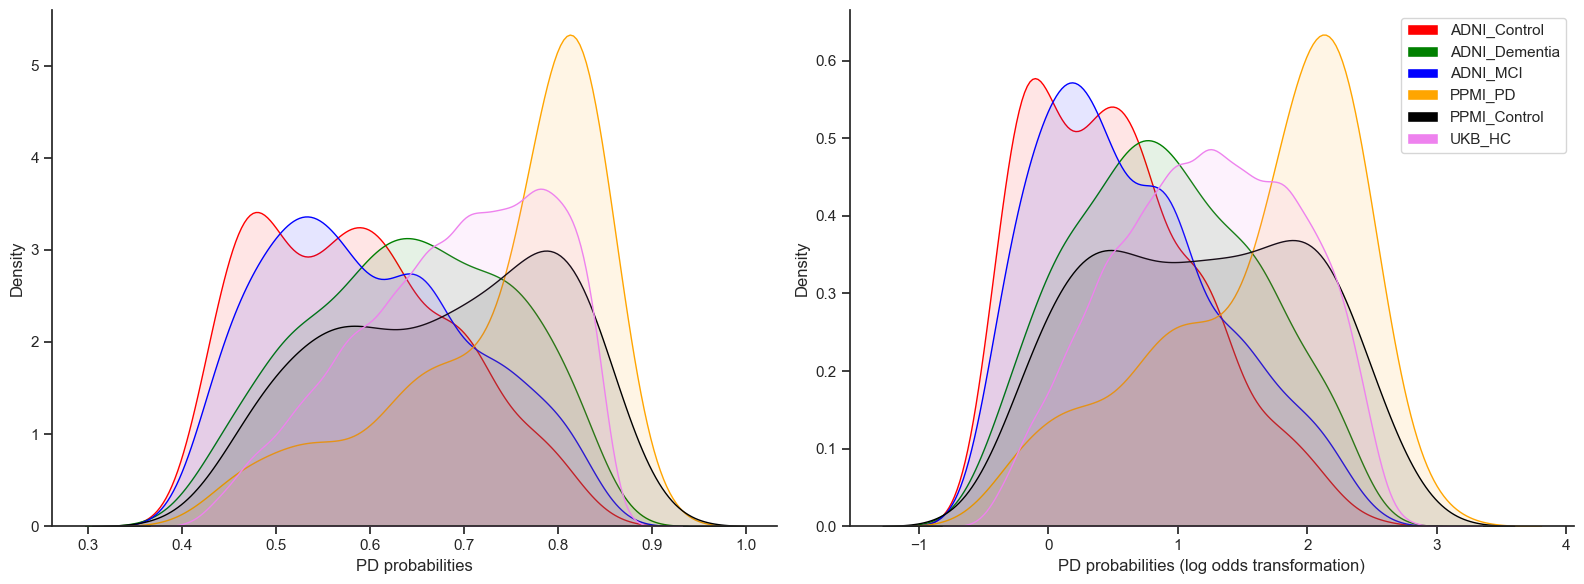

In [33]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(16,6))
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
colorlist = ['red', 'green', 'blue', 'orange', 'black', 'violet']
labels = []
for e, sd in enumerate(baseline_data['study_diagnosis'].unique()):
    sns.kdeplot(data=baseline_data[baseline_data['study_diagnosis']==sd], x='un_PD_score',color=colorlist[e], fill=colorlist[e], ax=ax, label=sd, alpha=0.1, linewidth=1,)
    labels.append(sd)

labels = []
for e, sd in enumerate(baseline_data['study_diagnosis'].unique()):
    sns.kdeplot(data=baseline_data[baseline_data['study_diagnosis']==sd], x='PD_score',color=colorlist[e], fill=colorlist[e], ax=ax2, label=sd, alpha=0.1, linewidth=1,)
    labels.append(sd)

handles = [mpatches.Patch(facecolor=colorlist[e], label=i.replace('UKBB_HC', 'UKB_HC')) for e, i in enumerate(labels)]
plt.legend(handles=handles, loc=0)
ax.set_xlabel('PD probabilities')
ax2.set_xlabel('PD probabilities (log odds transformation)')
plt.tight_layout()

plt.savefig("Step2_ml_model/PD_score_distribution_all_cohorts.png", dpi=200)
plt.savefig("Step2_ml_model/PD_score_distribution_all_cohorts.svg")
plt.show()